## Section 1 : Load libraries and data: 


In [65]:
#Load libraries :
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import sklearn.metrics as metrics

In [66]:
## Read the data :
data_house_price=pd.read_csv("Downloads/House_Price.csv")
data_house_price.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [67]:
## Dimension of data:
print(len(data_house_price))
print(data_house_price.shape[1])

506
19


## Section 2 : Exploratory analysis and missing value imputation :

In [68]:
## Letus now check the type of variables we have in our data set: 
data_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

##### From the info output it is cleaer that all the columns are well populated except n_hos_beds ; where we have few missing obs. Let us now do a descriptive analysis of the data set. 

In [69]:
data_house_price.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


#### Since the distribution of the variable n_hos_beds have mean and median similar with not so very high std dev; let us do a missing value imputation using the mean only here.

In [70]:
#Finding the mean of the column having NaN
mean_value=data_house_price['n_hos_beds'].mean()
# Replace the missing values mean of values in the same column
data_house_price['n_hos_beds'].fillna(value=mean_value, inplace=True)

## Section 3 : Encoding categorical variables : 

In [71]:
## We are now converting the categorical variables to dummy :
data_house_price['waterbody'] = data_house_price['waterbody'].astype('category')
data_house_price['bus_ter'] = data_house_price['bus_ter'].astype('category')
df = pd.get_dummies(data_house_price,columns = ['waterbody', 'bus_ter'])
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,airport,n_hos_beds,n_hot_rooms,rainfall,parks,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,YES,5.480,11.1920,23,0.049347,0,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,NO,7.332,12.1728,42,0.046146,1,0,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,NO,7.394,101.1200,38,0.045764,0,0,1,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,YES,9.268,11.2672,45,0.047151,1,0,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,NO,8.824,11.2896,55,0.039474,1,0,0,0,1


## Section 4:  Correlation analysis : 

In [ ]:
## The heat map shows the intercorrelation among the different variables 

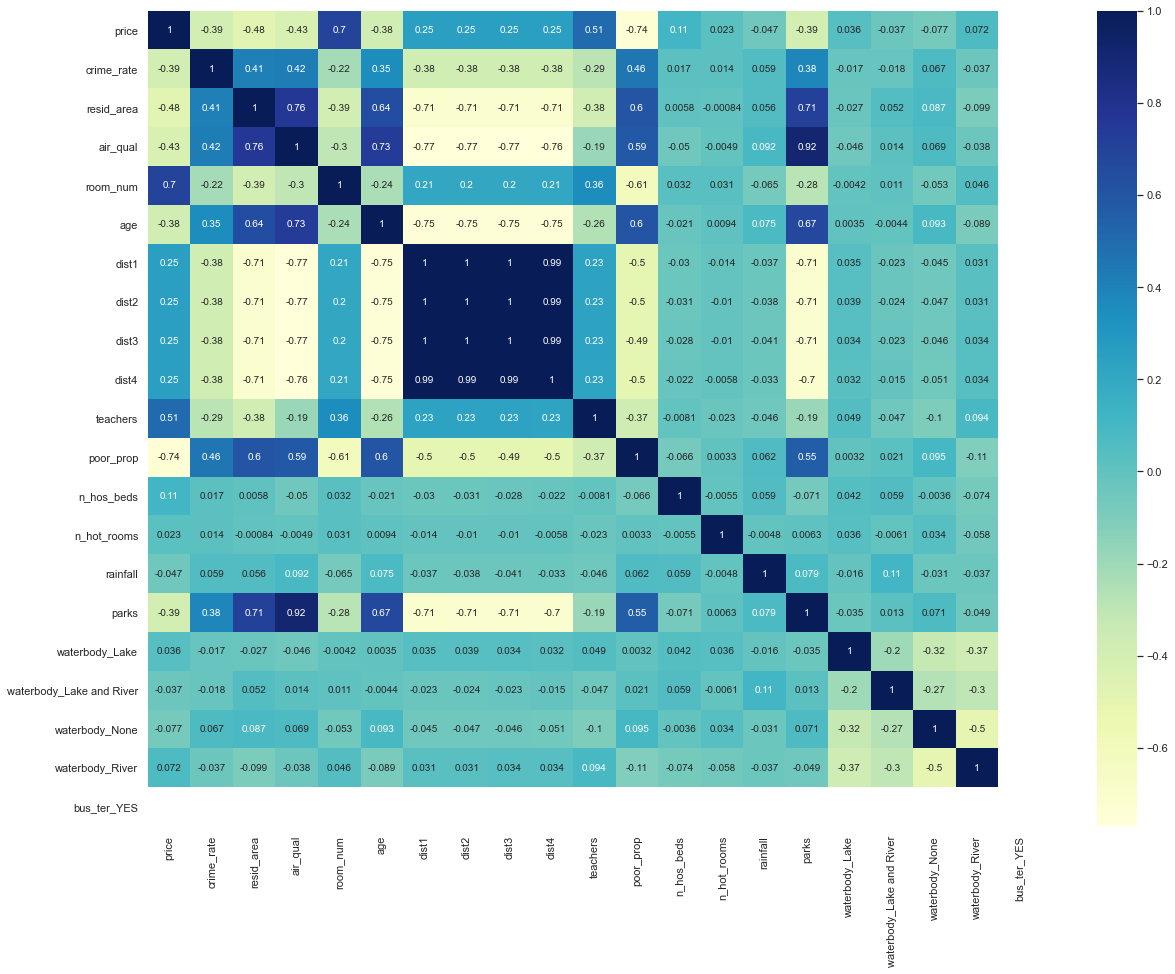

In [72]:
import matplotlib.pyplot as plt
import pandas as pd


fig = plt.figure(figsize =(20, 15))

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

#### Since the variable to be predicted is price ; let us now start looking into multi corelation and eliminate the drivers with high multi colienarity through VIF analysis.

In [73]:
 
def calculate_vif(thresh=6.0):
    
    ## your Code Here

    X = df.select_dtypes(include=np.number).drop('price', axis=1)
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) >= thresh:
            del variables[maxloc]
            dropped = True

    print(X.columns[variables])
    return pd.DataFrame(X.iloc[:, variables]).columns.tolist()


    
calculate_vif()

Index(['crime_rate', 'dist4', 'poor_prop', 'n_hot_rooms',
       'waterbody_Lake and River', 'waterbody_None', 'waterbody_River'],
      dtype='object')


['crime_rate',
 'dist4',
 'poor_prop',
 'n_hot_rooms',
 'waterbody_Lake and River',
 'waterbody_None',
 'waterbody_River']

In [75]:
## Let us now take the final varibales only for modelling :

final_var_list=['price','crime_rate',
 'dist4',
 'poor_prop',
 'n_hot_rooms',
 'waterbody_Lake and River',
 'waterbody_None',
 'waterbody_River']

df_final=df[final_var_list]
df_final.head()

,price,crime_rate,dist4,poor_prop,n_hot_rooms,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.00632,4.01,4.98,11.1920,0,0,1
1,21.6,0.02731,5.06,9.14,12.1728,0,0,0
2,34.7,0.02729,4.97,4.03,101.1200,0,1,0
3,33.4,0.03237,5.96,2.94,11.2672,0,0,0
4,36.2,0.06905,5.86,5.33,11.2896,0,0,0


## Section 5 : Model development: 

In [76]:
from sklearn.linear_model import LinearRegression

var_list=df_final.columns.to_list()

final_var_list.remove('price')

x_train, x_test, y_train, y_test = train_test_split(df_final[final_var_list],df_final['price'] , test_size=0.20, random_state=1)

model =  LinearRegression()
model.fit(x_train,y_train)
ypred_train = model.predict(x_train)
ypred_test = model.predict(x_test)

In [77]:
## Let us now find the Summary of model performance results :
### The below fucntion will do that

def regression_results(y_true, y_pred):

    # Regression metrics
    
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [78]:
## Model performance in training data set:
regression_results(y_train, ypred_train)

r2:  0.5816
MAE:  4.3133
MSE:  33.6588
RMSE:  5.8016


In [79]:
## Model performance in testing data set:
regression_results(y_test, ypred_test)

r2:  0.5603
MAE:  5.0343
MSE:  43.4549
RMSE:  6.592
